Import necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing (pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # plotting library
%matplotlib inline 

Download the heart dataset and assign it to a variable.

In [2]:
heart_data = pd.read_csv('C:/Users/emily/Desktop/Data_science/heart.csv')

What is the data type of each column?

In [3]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

See the first ten entries.

In [4]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


See the last ten entries.

In [5]:
heart_data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Check the number of observations in the dataset.

In [6]:
heart_data.shape[0]

303

Check the number of columns in the dataset.

In [7]:
heart_data.shape[1]

14

Print the name of all the columns.

In [8]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Check how the dataset is indexed?

In [9]:
heart_data.index

RangeIndex(start=0, stop=303, step=1)

What is the data structure of the columns?

In [10]:
type(heart_data['age'])

pandas.core.series.Series

In [11]:
type(heart_data['sex'])

pandas.core.series.Series

Summarize the dataframe.

In [12]:
heart_data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      1

What is the mean age of surveyed?

In [13]:
round(heart_data.age.mean())

54

What is the age with least occurrence?

In [14]:
heart_data.age.value_counts().tail()

37    2
77    1
76    1
74    1
29    1
Name: age, dtype: int64

Which sex is more popular in this dataset?

In [15]:
heart_data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

Are there any null values?

In [16]:
heart_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [17]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Rename columns

In [18]:
heart_data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

View data histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028257BCA2B0>,
      dtype=object)

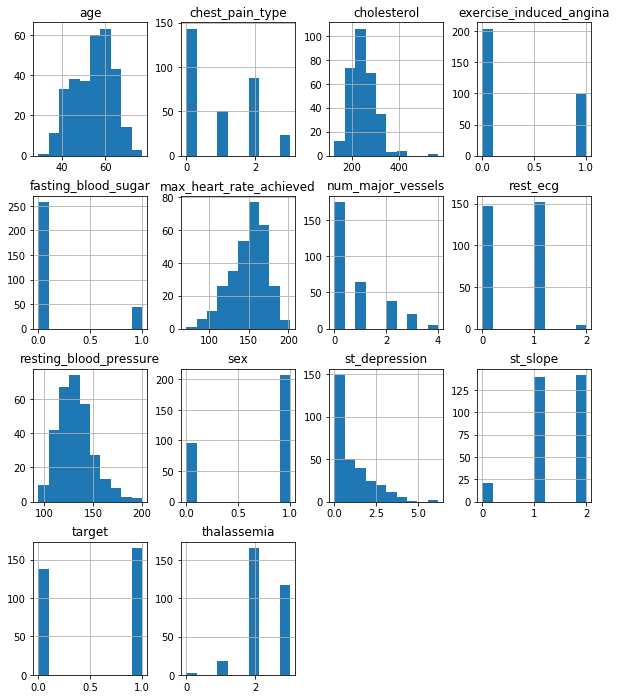

In [19]:
heart_data.hist(figsize= (10,12))

* Some observations based on viewing the histograms=
* The mean age is around 60.
* There are twice as many males than females.
* Most features are Categorical. Age, Chol, Oldpeak(st depression), Thalach (Max rate), Trestbps (Rest BP) are numerical.

Remove duplicates.

In [30]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [31]:
heart_data.drop_duplicates()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [32]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


I appears that no rows were dropped. Observe correlation between age and cholestral level in a hxbin.

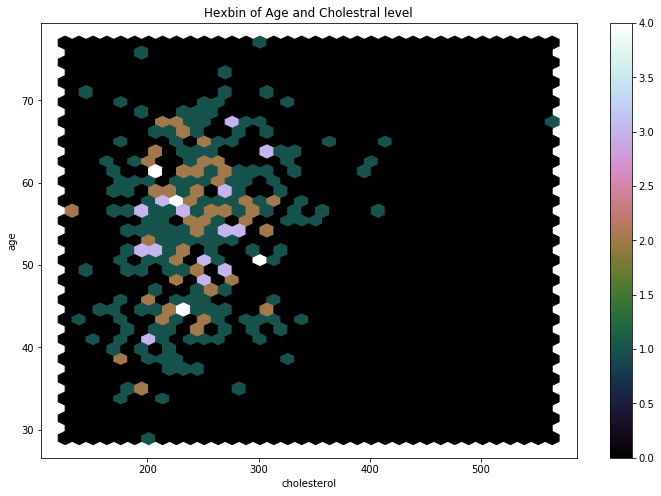

In [33]:
heart_data.plot(y= 'age', x ='cholesterol',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Age and Cholestral level',figsize=(12,8))

Observe correlation between cholestral level and resting blood pressure in a hxbin.

Next plot the age and sex of positive and negative diagnosed individuals.

C:\Users\emily\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


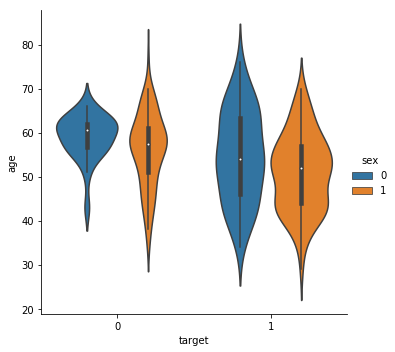

In [34]:
sns.catplot(x='target', y='age', hue='sex', kind= 'violin', data=heart_data)

View a bar graph of the age to compare after normalization.

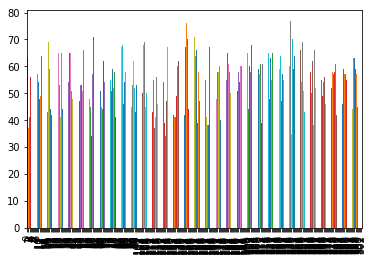

In [35]:
heart_data['age'].plot(kind='bar')

Extract the last column (outcome).

In [36]:
y = pd.DataFrame(heart_data.iloc[:,-1])
y.columns = ['Target']
df = heart_data.iloc[:, :-1]
y.head(10)

,Target
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


Normalize the non-catagorical data.

In [37]:
from sklearn import preprocessing

In [38]:
x = df[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']].values.astype(float)
print(x)

[[ 63.  145.  233.  150.    2.3]
 [ 37.  130.  250.  187.    3.5]
 [ 41.  130.  204.  172.    1.4]
 ...
 [ 68.  144.  193.  141.    3.4]
 [ 57.  130.  131.  115.    1.2]
 [ 57.  130.  236.  174.    0. ]]


Normalize the non-catagorical data.

In [39]:
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_norm = pd.DataFrame(x_scaled)

Choose the columns that are not categorical.

In [40]:
df_norm.columns = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
df_norm.head(10)



,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
0,0.708333,0.481132,0.244292,0.603053,0.370968
1,0.166667,0.339623,0.283105,0.885496,0.564516
2,0.250000,0.339623,0.178082,0.770992,0.225806
3,0.562500,0.245283,0.251142,0.816794,0.129032
4,0.583333,0.245283,0.520548,0.702290,0.096774
5,0.583333,0.433962,0.150685,0.587786,0.064516
6,0.562500,0.433962,0.383562,0.625954,0.209677
7,0.312500,0.245283,0.312785,0.778626,0.000000
8,0.479167,0.735849,0.166667,0.694656,0.080645
9,0.583333,0.528302,0.095890,0.786260,0.258065


View a bar graph of the age to compare to the one before normalization.

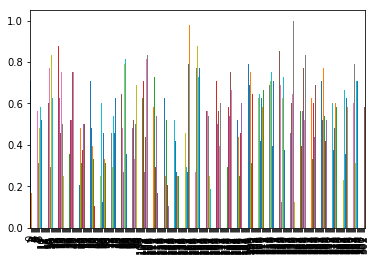

In [43]:
df_norm['age'].plot(kind='bar')

The before and after age bar graphs are shaped similarly, but now the range is between 0 and 1, rather than 30 and 80. Next, remove columns that have been normalized, so we are left with categorical data.

In [44]:
df_cat = df.drop(["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "st_depression"],1)
df_cat.head(10)

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,num_major_vessels,thalassemia
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
5,1,0,0,1,0,1,0,1
6,0,1,0,0,0,1,0,2
7,1,1,0,1,0,2,0,3
8,1,2,1,1,0,2,0,3
9,1,2,0,1,0,2,0,2


In [45]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
sex                        303 non-null int64
chest_pain_type            303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
exercise_induced_angina    303 non-null int64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
dtypes: int64(8)
memory usage: 19.0 KB


One hot encode categorical values.

In [46]:
from sklearn.preprocessing import OneHotEncoder #import files
onehot = OneHotEncoder(sparse=False)

sex = df_cat['sex'].values #change data frame into array
integer_encoded = sex.reshape(len(sex), 1)
sex= onehot.fit_transform(integer_encoded) #one hot encode the data
sex = pd.DataFrame(data=sex) #change array into data frame
sex.columns = ['female', 'male'] #change columns to represent the data
sex.head(1)

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,female,male
0,0.0,1.0


In [47]:
chest_pain_type = df_cat['chest_pain_type'].values
integer_encoded = chest_pain_type.reshape(len(chest_pain_type), 1)
chest_pain_type = onehot.fit_transform(integer_encoded)
chest_pain_type = pd.DataFrame(data=chest_pain_type)
chest_pain_type.columns = ['typical_angina', 'atypical_angina', 'non_anginal_pain', 'asymptomatic_pain']
chest_pain_type.head(1)

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,typical_angina,atypical_angina,non_anginal_pain,asymptomatic_pain
0,0.0,0.0,0.0,1.0


In [48]:
rest_ecg = df_cat['rest_ecg'].values
integer_encoded = rest_ecg.reshape(len(rest_ecg), 1)
rest_ecg = onehot.fit_transform(integer_encoded)
rest_ecg = pd.DataFrame(rest_ecg)
rest_ecg.columns = ['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy']
rest_ecg.head(1)

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,normal,ST-T wave abnormality,left ventricular hypertrophy
0,1.0,0.0,0.0


In [49]:
exercise_induced_angina = df_cat['exercise_induced_angina'].values
integer_encoded = exercise_induced_angina.reshape(len(exercise_induced_angina), 1)
exercise_induced_angina = onehot.fit_transform(integer_encoded)
exercise_induced_angina = pd.DataFrame(exercise_induced_angina)
exercise_induced_angina.columns = ['not_exercise_induced_angina', 'exercise_induced_angina']
exercise_induced_angina.head(1)

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,not_exercise_induced_angina,exercise_induced_angina
0,1.0,0.0


In [50]:
st_slope = df_cat['st_slope'].values
integer_encoded = st_slope.reshape(len(st_slope), 1)
st_slope = onehot.fit_transform(integer_encoded)
st_slope = pd.DataFrame(st_slope)
st_slope.columns = ['upsloping', 'flat', 'downsloping']
st_slope.head(1)

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,upsloping,flat,downsloping
0,1.0,0.0,0.0


In [51]:
num_major_vessels = df_cat['num_major_vessels'].values
integer_encoded = num_major_vessels.reshape(len(num_major_vessels), 1)
num_major_vessels = onehot.fit_transform(integer_encoded)
num_major_vessels = pd.DataFrame(num_major_vessels)
num_major_vessels.columns = ['num_vessels_0', 'num_vessels_1', 'num_vessels_2', 'num_vessels_3', 'num_vessels_4']
num_major_vessels.head(1)

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,num_vessels_0,num_vessels_1,num_vessels_2,num_vessels_3,num_vessels_4
0,1.0,0.0,0.0,0.0,0.0


In [52]:
thalassemia = df_cat['thalassemia'].values
integer_encoded = thalassemia.reshape(len(thalassemia), 1)
thalassemia = onehot.fit_transform(integer_encoded)
thalassemia = thalassemia[:,1:]
thalassemia = pd.DataFrame(thalassemia)
thalassemia.columns = ['thalassemia_normal', 'fixed defect', 'reversable defect']
thalassemia.head(1)

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,thalassemia_normal,fixed defect,reversable defect
0,1.0,0.0,0.0


In [53]:
fasting_blood_sugar = df_cat['fasting_blood_sugar'].values
integer_encoded = fasting_blood_sugar.reshape(len(fasting_blood_sugar), 1)
fasting_blood_sugar = onehot.fit_transform(integer_encoded)
fasting_blood_sugar = pd.DataFrame(fasting_blood_sugar)
fasting_blood_sugar.columns = ['over_120_fasting_blood_sugar', 'under_120_fasting_blood_sugar']
fasting_blood_sugar.head(1)

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,over_120_fasting_blood_sugar,under_120_fasting_blood_sugar
0,0.0,1.0


Combine all categorical features, now seperated by one hot encoding.

In [54]:
df_cat = pd.concat([sex, chest_pain_type, rest_ecg, exercise_induced_angina, st_slope, num_major_vessels, thalassemia, fasting_blood_sugar], axis=1)
df_cat.head(10)

,female,male,typical_angina,atypical_angina,non_anginal_pain,asymptomatic_pain,normal,ST-T wave abnormality,left ventricular hypertrophy,not_exercise_induced_angina,...,num_vessels_0,num_vessels_1,num_vessels_2,num_vessels_3,num_vessels_4,thalassemia_normal,fixed defect,reversable defect,over_120_fasting_blood_sugar,under_120_fasting_blood_sugar
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [55]:
finalDf = pd.concat([df_cat, df_norm], axis = 1)

In [56]:
finalDf.head(10)

,female,male,typical_angina,atypical_angina,non_anginal_pain,asymptomatic_pain,normal,ST-T wave abnormality,left ventricular hypertrophy,not_exercise_induced_angina,...,thalassemia_normal,fixed defect,reversable defect,over_120_fasting_blood_sugar,under_120_fasting_blood_sugar,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.708333,0.481132,0.244292,0.603053,0.370968
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.166667,0.339623,0.283105,0.885496,0.564516
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.250000,0.339623,0.178082,0.770992,0.225806
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.562500,0.245283,0.251142,0.816794,0.129032
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.583333,0.245283,0.520548,0.702290,0.096774
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.583333,0.433962,0.150685,0.587786,0.064516
6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.562500,0.433962,0.383562,0.625954,0.209677
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.312500,0.245283,0.312785,0.778626,0.000000
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.479167,0.735849,0.166667,0.694656,0.080645
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.583333,0.528302,0.095890,0.786260,0.258065


View data histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002825A9EFE80>,
      dtype=object)

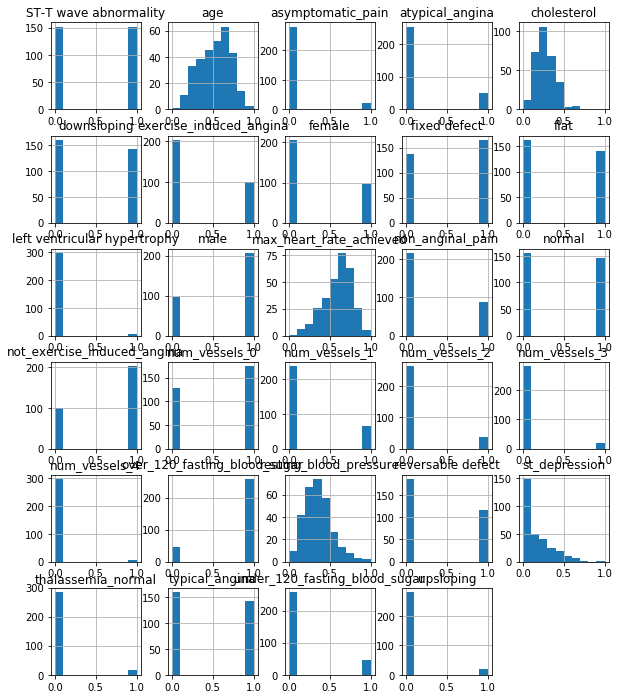

In [57]:
finalDf.hist(figsize= (10,12))

Combine the feature data with the total column for saving.

In [58]:
finalDf_w_target = pd.concat([finalDf, y], axis = 1)

Save the data to use in the next notebook.

In [60]:
export_csv = finalDf_w_target.to_csv (r'C:\Users\Emily\Desktop\heart_clean.csv', index = None, header=True)
